Importing required libraries to predict acceleration using random forest, calculate RMSE (RootMeanSquaredError), and create plots to compare predicted and actual acceleration

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

#import src
import FileProcessing
import ModelClass

import random
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow
from tensorflow.keras import layers

Loading the cleaned ngsim data using pandas

In [2]:
fileProcessing=FileProcessing.FileProcessing()

In [3]:
model_obj=ModelClass.ModelClass()
#model1=ModelClass.ModelClass()
#model_obj=ModelClass()

In [4]:
file_name='Cleaned_NGSIM_Data'
ngsim=fileProcessing.read_input(file_name)

original File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\scripts
Data File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\data


In [5]:
#define the timeframe for the run
time_frame=0.5
shift_instance=time_frame*10
ngsim,train_df, val_df,test_df,X_train,y_train,X_val,y_val,X_test,y_test=model_obj.preprocessing(ngsim,shift_instance)

In [8]:
model=model_obj.define_neural_network(X_train)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6, 1)]            0         
_________________________________________________________________
Block1_Conv1 (Conv1D)        (None, 6, 16)             48        
_________________________________________________________________
Block1_Conv2 (Conv1D)        (None, 6, 16)             528       
_________________________________________________________________
Block1_Pool (MaxPooling1D)   (None, 3, 16)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3, 16)             64        
_________________________________________________________________
dropout (Dropout)            (None, 3, 16)             0         
_________________________________________________________________
Block2_Conv1 (Conv1D)        (None, 3, 32)            

Epoch 1/10
329021/329021 [==============================] - 541s 2ms/step - loss: 1.8493 - accuracy: 0.2809 - val_loss: 1.8558 - val_accuracy: 0.2623
Epoch 2/10
329021/329021 [==============================] - 631s 2ms/step - loss: 1.8483 - accuracy: 0.2824 - val_loss: 1.8541 - val_accuracy: 0.2688
Epoch 3/10
329021/329021 [==============================] - 617s 2ms/step - loss: 1.8480 - accuracy: 0.2852 - val_loss: 1.8566 - val_accuracy: 0.2955
Epoch 4/10
329021/329021 [==============================] - 530s 2ms/step - loss: 1.8486 - accuracy: 0.2821 - val_loss: 1.8571 - val_accuracy: 0.2758
Epoch 5/10
329021/329021 [==============================] - 502s 2ms/step - loss: 1.8497 - accuracy: 0.2814 - val_loss: 1.8585 - val_accuracy: 0.2961
Epoch 6/10
329021/329021 [==============================] - 490s 1ms/step - loss: 1.8511 - accuracy: 0.2850 - val_loss: 1.8600 - val_accuracy: 0.2973
Epoch 7/10
329021/329021 [==============================] - 487s 1ms/step - loss: 1.8512 - accuracy:

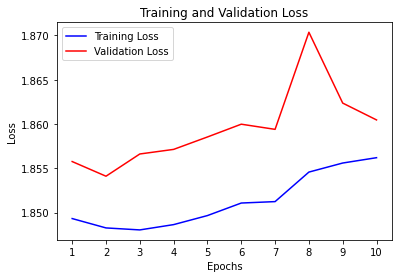

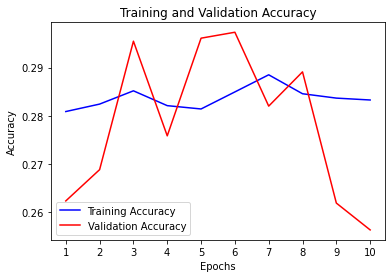

In [9]:
model=model_obj.fit_neural_network(model,X_train,y_train,X_val,y_val)

In [10]:
predict_on_pair=model_obj.prediction_test_pairs(test_df,10,12)
predict_on_pair[0]

'49-51'

In [11]:
test_df[test_df['L-F_Pair'].isin(predict_on_pair)]

,Local_Y,v_Class,v_Vel,v_Acc,Location,Rear_to_Front_Space_Headway,Front_To_Rear_Time_Headway,Velocity Difference_Following-Preceding,Acceleration Difference_Following-Preceding,L-F_Pair,...,preceding_Vehicle_Velocity,preceding_Vehicle_Acceleration,preceding_Local_Y,preceding_v_Class,pair_Time_Duration,total_pair_duration,Location_cat,nextframeAcc,nextframesvel,nextframeposition
18700,597.810974,2,18.675097,0.597408,us-101,1.414272,0.075730,-0.542544,0.691896,49-51,...,19.217640,-0.094488,603.339417,2.0,0.000000,37.400002,1,-0.850392,18.650711,599.688538
18750,599.688538,2,18.650711,-0.850392,us-101,1.444752,0.077464,-0.606552,-2.383536,49-51,...,19.257263,1.533144,605.248047,2.0,0.100000,37.400002,1,-0.021336,18.659857,601.545654
18835,601.545654,2,18.659857,-0.021336,us-101,1.520952,0.081509,-0.755904,-1.609344,49-51,...,19.415760,1.588008,607.179871,2.0,0.200000,37.400002,1,1.630680,18.742151,603.403137
18915,603.403137,2,18.742151,1.630680,us-101,1.615440,0.086193,-0.816864,0.454152,49-51,...,19.559015,1.176528,609.133057,2.0,0.300000,37.400002,1,2.487168,18.894552,605.276428
18988,605.276428,2,18.894552,2.487168,us-101,1.700784,0.090015,-0.801624,0.902208,49-51,...,19.696177,1.584960,611.091980,2.0,0.400000,37.400002,1,1.213104,19.089624,607.185059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901547,634.962708,2,12.192000,0.000000,us-101,17.867376,1.465500,-0.917448,0.060960,49-51,...,13.109448,-0.060960,656.946106,1.0,37.000000,37.400002,1,0.000000,12.188952,636.181885
901618,636.181885,2,12.188952,0.000000,us-101,17.958817,1.473368,-0.917448,0.000000,49-51,...,13.106400,0.000000,658.256165,1.0,37.099998,37.400002,1,-1.045464,12.124944,637.407837
901672,637.407837,2,12.124944,-1.045464,us-101,18.044161,1.488185,-0.981456,-1.045464,49-51,...,13.106400,0.000000,659.566772,1.0,37.200001,37.400002,1,-1.947672,11.975592,638.619995
901822,638.619995,2,11.975592,-1.947672,us-101,18.141697,1.514889,-1.130808,-1.947672,49-51,...,13.106400,0.000000,660.877441,1.0,37.299999,37.400002,1,-0.929640,11.868912,639.802612


In [12]:
'''features:
'Rear_to_Front_Space_Headway', 
'preceding_v_Class',
"v_Class",
'Velocity Difference_Following-Preceding',
 'v_Vel',
 'Location_cat']]
predicted_data = prediction(test_df, predict_on_pair, target_variable, model,0.1)
'''
def prediction(test_df,test_range,target_variable,model,time_frame):
    predicted_df = []
    #this loop runs for each pair required predictions. 
    for current_pair in test_range:
        #Assign shape of the predictions
        input_df = []
        input_df = test_df[test_df['L-F_Pair']== current_pair]
        spacing = np.zeros(input_df.shape[0])
        local_y_subject=np.zeros(input_df.shape[0])
        local_y_preceding=np.zeros(input_df.shape[0])
        dv = np.zeros(input_df.shape[0])
        vel=np.zeros(input_df.shape[0])
        pred_acc = np.zeros(input_df.shape[0])
        
        #updating the values for first Predictions
        vel[0]=input_df.iloc[0]['v_Vel']
        spacing[0] = input_df.iloc[0]['Rear_to_Front_Space_Headway']
        dv[0] = input_df.iloc[0]['Velocity Difference_Following-Preceding']   

        pred_acc[0] = input_df.iloc[0]['v_Acc']
        local_y_subject[0]=input_df.iloc[0]['Local_Y']
        local_y_preceding[0]=input_df.iloc[0]['preceding_Local_Y']
        preceding_vehicle_class=input_df.iloc[0]['preceding_v_Class']
        vehicle_class=input_df.iloc[0]['v_Class']
        #vehicle_combination= input_df.iloc[0]['Vehicle_combination_cat']
        length_preceding_vehicle=input_df.iloc[0]['preceding_vehicle_length']
        location=input_df.iloc[0]['Location_cat']
        
        #predicting first value of acceleration
             
        predict_for_input=np.array([spacing[0],preceding_vehicle_class,vehicle_class,dv[0],vel[0],location]).reshape(1,-1)        
        pred_acc[1] = model.predict(predict_for_input)
        #calculating vel,frspacing,local.y,dv from the predicted acceleration.
        
        for j in range(1,len(input_df)):
        # v= u + at
            vel[j] = vel[j-1]+(pred_acc[j-1]*time_frame)
        
        #dv=current velocity of subject - velocity of Lead/Preceding
            dv[j] = vel[j] - input_df.iloc[j]['preceding_Vehicle_Velocity']
        
        #distance travelled by vehicle. :s 
        # s = ut + 0.5*a*t^2
            s_subject= ((vel[j-1]*time_frame) + (0.5*pred_acc[j-1]*pow(time_frame,2)))
            
            #s_lead= ((input_df.iloc[j-1]['preceding_Vehicle_Velocity']*time_frame) + (0.5*input_df.iloc[j-1]['preceding_Vehicle_Acceleration']*pow(time_frame,2)))
            
            local_y_subject[j]=  local_y_subject[j-1] + s_subject
            #spacing[j] = spacing[j-1]+ s_lead- s_subject
            local_y_preceding[j]=  input_df.iloc[j-1]['preceding_Local_Y']
            spacing[j]=local_y_preceding[j] - local_y_subject[j] - input_df.iloc[j-1]['preceding_Local_Y'] -length_preceding_vehicle
            print(f"s_subject: {s_subject},local_y_subject:{local_y_subject[j]},local_y_preceding: {local_y_preceding[j]},spacing[j]:{spacing[j]}")
            if j == len(input_df)-1: # as we are predicting the next values, we should not predict for the last one. 
                break
            #if j == 5: # this is temporary
            #    break
            
            predict_for_input=np.array([spacing[j],preceding_vehicle_class,vehicle_class,dv[j],vel[j],location]).reshape(1,-1)
            #pred_acc[j+1] = model.predict(np.array([spacing[j],vehicle_combination,local_y[j],dv[j],vel[j]])) 
            pred_acc[j+1] = model.predict(predict_for_input) 
            print(f"j: {j},predict_for_input:{predict_for_input},pred_acc: {pred_acc[j+1]}")

             ########
             #print(pred_acc)
             ########
        
        print(f"input_df shape: {input_df.shape}")
        print(f"pred_acc shape: {pred_acc.shape}")
        input_df['predicted_acceleration']=pred_acc
        input_df['predicted_velocity']=vel

        predicted_df.append(input_df)
        result = pd.concat(predicted_df)
    return result

In [13]:
target_variable = 'nextframeAcc'

predicted_data = prediction(test_df, predict_on_pair, target_variable, model,time_frame)

s_subject: 1.8704966911673546,local_y_subject:599.6814708122611,local_y_preceding: 603.3394165039062,spacing[j]:-603.79627078861
j: 1,predict_for_input:[[-6.03796271e+02  2.00000000e+00  2.00000000e+00 -5.22425872e-01
   1.87348373e+01  1.00000000e+00]],pred_acc: 0.22537025809288025
s_subject: 1.874638940393925,local_y_subject:601.556109752655,local_y_preceding: 605.248046875,spacing[j]:-605.6709097290038
j: 2,predict_for_input:[[-605.67090973    2.            2.           -0.65781854   18.7579415
     1.        ]],pred_acc: 0.22537025809288025
s_subject: 1.8769210009276867,local_y_subject:603.4330307535827,local_y_preceding: 607.1798706054688,spacing[j]:-607.5478307299315
j: 3,predict_for_input:[[-607.54783073    2.            2.           -0.77853675   18.78047852
     1.        ]],pred_acc: 0.22537025809288025
s_subject: 1.8791747035086155,local_y_subject:605.3122054570913,local_y_preceding: 609.133056640625,spacing[j]:-609.4270054334402
j: 4,predict_for_input:[[-609.42700543    2. 

In [14]:
predicted_data

,Local_Y,v_Class,v_Vel,v_Acc,Location,Rear_to_Front_Space_Headway,Front_To_Rear_Time_Headway,Velocity Difference_Following-Preceding,Acceleration Difference_Following-Preceding,L-F_Pair,...,preceding_Local_Y,preceding_v_Class,pair_Time_Duration,total_pair_duration,Location_cat,nextframeAcc,nextframesvel,nextframeposition,predicted_acceleration,predicted_velocity
18700,597.810974,2,18.675097,0.597408,us-101,1.414272,0.075730,-0.542544,0.691896,49-51,...,603.339417,2.0,0.000000,37.400002,1,-0.850392,18.650711,599.688538,0.597408,18.675097
18750,599.688538,2,18.650711,-0.850392,us-101,1.444752,0.077464,-0.606552,-2.383536,49-51,...,605.248047,2.0,0.100000,37.400002,1,-0.021336,18.659857,601.545654,0.231042,18.734837
18835,601.545654,2,18.659857,-0.021336,us-101,1.520952,0.081509,-0.755904,-1.609344,49-51,...,607.179871,2.0,0.200000,37.400002,1,1.630680,18.742151,603.403137,0.225370,18.757941
18915,603.403137,2,18.742151,1.630680,us-101,1.615440,0.086193,-0.816864,0.454152,49-51,...,609.133057,2.0,0.300000,37.400002,1,2.487168,18.894552,605.276428,0.225370,18.780479
18988,605.276428,2,18.894552,2.487168,us-101,1.700784,0.090015,-0.801624,0.902208,49-51,...,611.091980,2.0,0.400000,37.400002,1,1.213104,19.089624,607.185059,0.225370,18.803016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50441,603.234253,2,18.742151,1.002792,us-101,32.591248,1.738928,-0.112776,1.581912,224-228,...,640.346069,2.0,38.200001,38.599998,1,3.413760,18.891504,605.093506,0.225370,18.810312
50535,605.093506,2,18.891504,3.413760,us-101,32.600391,1.725664,-0.051816,1.600200,224-228,...,642.214539,2.0,38.299999,38.599998,1,2.167128,19.171921,607.005554,0.225370,18.832849
50569,607.005554,2,19.171921,2.167128,us-101,32.542480,1.697403,0.228600,2.167128,224-228,...,644.067688,2.0,38.400002,38.599998,1,0.033528,19.302984,608.950500,0.225370,18.855386
50689,608.950500,2,19.302984,0.033528,us-101,32.579056,1.687773,0.359664,0.033528,224-228,...,646.049194,2.0,38.500000,38.599998,1,-0.118872,19.299936,610.881714,0.225370,18.877923


In [15]:
prediction1 = predicted_data[predicted_data["L-F_Pair"]== predict_on_pair[0]]
prediction1

,Local_Y,v_Class,v_Vel,v_Acc,Location,Rear_to_Front_Space_Headway,Front_To_Rear_Time_Headway,Velocity Difference_Following-Preceding,Acceleration Difference_Following-Preceding,L-F_Pair,...,preceding_Local_Y,preceding_v_Class,pair_Time_Duration,total_pair_duration,Location_cat,nextframeAcc,nextframesvel,nextframeposition,predicted_acceleration,predicted_velocity
18700,597.810974,2,18.675097,0.597408,us-101,1.414272,0.075730,-0.542544,0.691896,49-51,...,603.339417,2.0,0.000000,37.400002,1,-0.850392,18.650711,599.688538,0.597408,18.675097
18750,599.688538,2,18.650711,-0.850392,us-101,1.444752,0.077464,-0.606552,-2.383536,49-51,...,605.248047,2.0,0.100000,37.400002,1,-0.021336,18.659857,601.545654,0.231042,18.734837
18835,601.545654,2,18.659857,-0.021336,us-101,1.520952,0.081509,-0.755904,-1.609344,49-51,...,607.179871,2.0,0.200000,37.400002,1,1.630680,18.742151,603.403137,0.225370,18.757941
18915,603.403137,2,18.742151,1.630680,us-101,1.615440,0.086193,-0.816864,0.454152,49-51,...,609.133057,2.0,0.300000,37.400002,1,2.487168,18.894552,605.276428,0.225370,18.780479
18988,605.276428,2,18.894552,2.487168,us-101,1.700784,0.090015,-0.801624,0.902208,49-51,...,611.091980,2.0,0.400000,37.400002,1,1.213104,19.089624,607.185059,0.225370,18.803016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901547,634.962708,2,12.192000,0.000000,us-101,17.867376,1.465500,-0.917448,0.060960,49-51,...,656.946106,1.0,37.000000,37.400002,1,0.000000,12.188952,636.181885,0.193053,26.930854
901618,636.181885,2,12.188952,0.000000,us-101,17.958817,1.473368,-0.917448,0.000000,49-51,...,658.256165,1.0,37.099998,37.400002,1,-1.045464,12.124944,637.407837,0.192422,26.950159
901672,637.407837,2,12.124944,-1.045464,us-101,18.044161,1.488185,-0.981456,-1.045464,49-51,...,659.566772,1.0,37.200001,37.400002,1,-1.947672,11.975592,638.619995,0.191965,26.969401
901822,638.619995,2,11.975592,-1.947672,us-101,18.141697,1.514889,-1.130808,-1.947672,49-51,...,660.877441,1.0,37.299999,37.400002,1,-0.929640,11.868912,639.802612,0.191630,26.988598


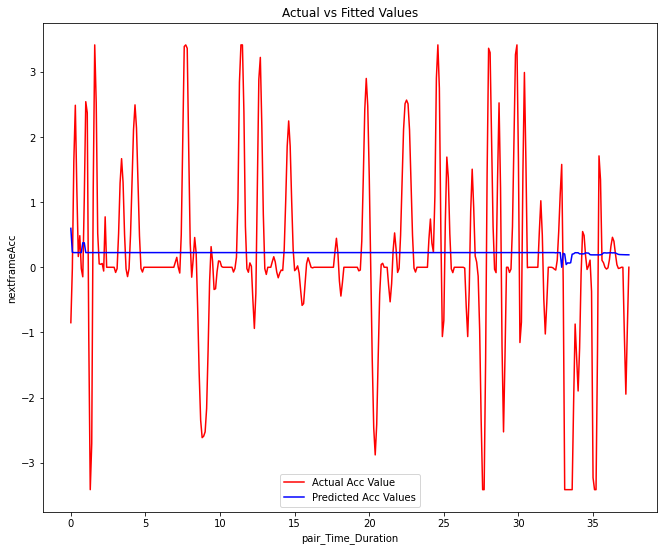

In [16]:
plt.figure(figsize=(11, 9))


ax = sns.lineplot(x=prediction1["pair_Time_Duration"], y = prediction1["nextframeAcc"], color="r", label="Actual Acc Value")
sns.lineplot(x=prediction1["pair_Time_Duration"], y =prediction1["predicted_acceleration"],  color="b", label="Predicted Acc Values" )


plt.title('Actual vs Fitted Values')


plt.show()
plt.close()



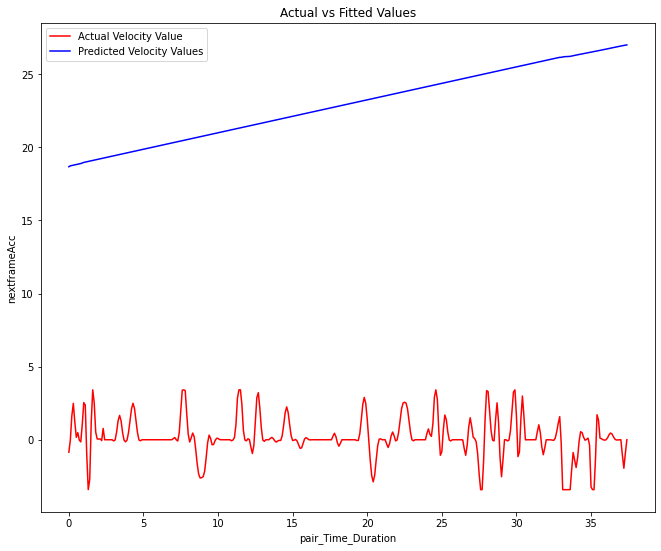

In [19]:
plt.figure(figsize=(11, 9))


ax = sns.lineplot(x=prediction1["pair_Time_Duration"], y = prediction1["nextframeAcc"], color="r", label="Actual Velocity Value")
sns.lineplot(x=prediction1["pair_Time_Duration"], y =prediction1["predicted_velocity"],  color="b", label="Predicted Velocity Values" )


plt.title('Actual vs Fitted Values')


plt.show()
plt.close()

In [18]:
ngsim.columns

Index(['Local_Y', 'v_Class', 'v_Vel', 'v_Acc', 'Location',
       'Rear_to_Front_Space_Headway', 'Front_To_Rear_Time_Headway',
       'Velocity Difference_Following-Preceding',
       'Acceleration Difference_Following-Preceding', 'L-F_Pair',
       'preceding_vehicle_length', 'preceding_Vehicle_Velocity',
       'preceding_Vehicle_Acceleration', 'preceding_Local_Y',
       'preceding_v_Class', 'pair_Time_Duration', 'total_pair_duration',
       'Location_cat', 'nextframeAcc', 'nextframesvel', 'nextframeposition'],
      dtype='object')